In [414]:
import numpy as np
import glob
import os

import numpy as np
import glob
import os
import matplotlib.pyplot as plt






from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


import matplotlib.pyplot as plt
import numpy as np

In [415]:
E = lambda r0,r,a, D, r1: D* ( np.exp(-2*a*(r-r0)) -2 *np.exp(-a*(r-r0)))

In [416]:
(4.125*2.5*2)+np.log(2)/a

29.28933975699932

In [417]:

a = .08
r0 = (4.125*2.5*2)+np.log(2)/a
D=.1

r1 = 2*4.125*2.5*1.2
r = np.linspace(4.125*2.5*1.95,4*r1,1000)
E(r0,r,a,D,r1);

In [418]:
r0

29.28933975699932

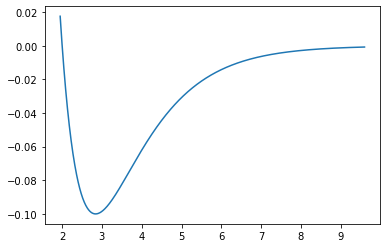

In [419]:
plt.plot(r/(4.125*2.5),E(r0,r,a,D,r1))

In [465]:
file = "atoms.bp"




In [466]:
f = open(file)

In [467]:
t_str = []
with open (file) as myfile:
    i=0
    for line in myfile:
        if i==1:
            t_str.append(line)
            i=0
        if "ITEM: TIMESTEP\n" in line:
            i=1
            


In [468]:
t_arr = [int(i) for i in t_str]

In [500]:
len(t_arr)

6

In [503]:
cell_arr  = np.zeros((len(t_arr) - 1,7500, 9 ))
for t in range(len(t_arr)-1):
    i=0
    i_end=t
    cell_str = []
    with open (file) as myfile:
        for line in myfile:

            if ("ITEM: ATOMS" in line) and (i==i_end):
                break

            if ("ITEM: ATOMS" in line) and (i<i_end):
                i+=1

        for line in myfile:
            if "ITEM: TIMESTEP" in line:
                break
            cell_str.append(line)
            
            
    cell_arr[t] = np.array([np.array(cell_str[i].split( )[1:]).astype(float) for i in range(len(cell_str))])

            

            


In [493]:
cell_arr = np.array([np.array(cell_str[i].split( )[1:]).astype(float) for i in range(len(cell_str))])

In [506]:
cell_arr.shape

(5, 7500, 9)

In [495]:
np.sum(cell_arr[:,7:]**2,axis=1)**.5

array([0.15578376, 0.01750237, 0.02238236, ..., 0.03850999, 0.08235795,
       0.05465953])

[0.24923764 0.02928455 0.05513695 ... 0.1499924  0.12417333 0.17700156]


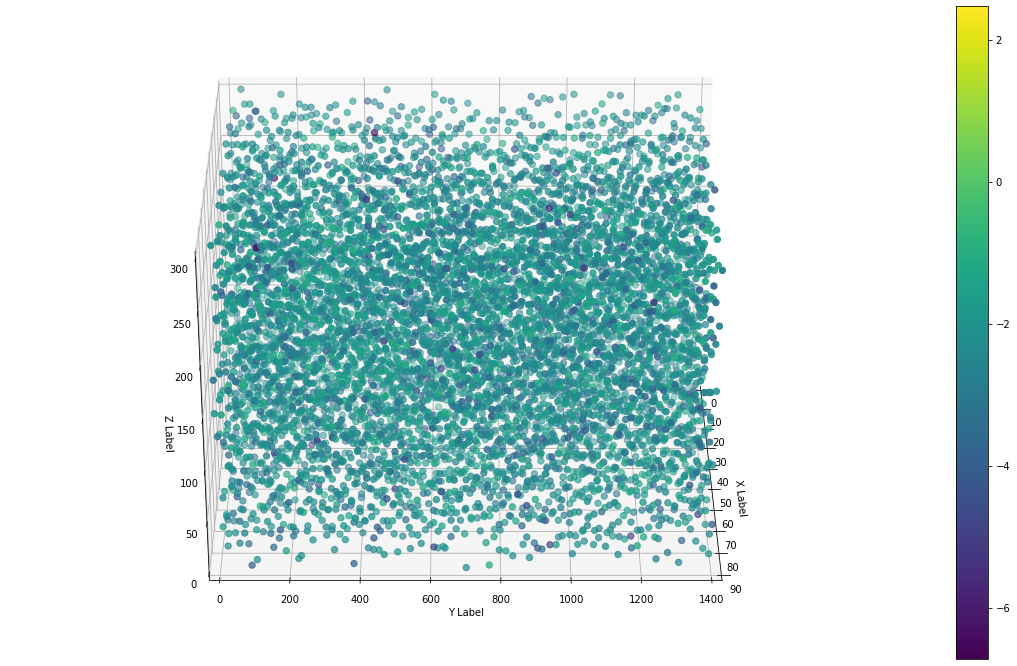

In [523]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')



n = 200

t =4
xlim=90
ylim = 1400
zlim=300
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for m in arr:
#    ax.scatter(*m[1:4],s= (m[4])**2,cmap='viridis')
x=cell_arr[t,:,0].flatten()*xlim
y= cell_arr[t,:,1].flatten()*ylim
z=cell_arr[t,:,2].flatten()*zlim
f = np.sum(cell_arr[t,:,7:]**2,axis=1)**.5

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([0,90])
ax.set_ylim([0,1400])

ax.set_zlim([0,300])



im = ax.scatter(x, y, z,c=np.log(f),s=40,
                vmin=np.log(np.min(np.sum(cell_arr[:,:,7:]**2,axis=2)**.5)),
                vmax=np.log(np.max(np.sum(cell_arr[:,:,7:]**2,axis=2)**.5)),
                cmap='viridis');
ax.view_init(30, 360)
print(f)
plt.colorbar(im)
plt.show()


In [518]:
np.max(np.sum(cell_arr[:,:,7:]**2,axis=2)**.5)

11.807084559809843

In [476]:
z

array([ 10.03953 ,  14.15337 ,   1.078989, ..., 288.0879  ,   1.375692,
       288.4788  ])

In [191]:
t_arr

[0,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000,
 41000,
 42000,
 43000,
 44000,
 45000,
 46000,
 47000,
 48000,
 49000,
 50000,
 51000,
 52000,
 53000,
 54000,
 55000,
 56000,
 57000,
 58000,
 59000,
 60000,
 61000,
 62000,
 63000,
 64000,
 65000,
 66000,
 67000,
 68000,
 69000,
 70000,
 71000,
 72000,
 73000,
 74000,
 75000,
 76000,
 77000,
 78000,
 79000,
 80000]